> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

Copyright: Não disponível
Explicação: ght billion people are about to disappear in this snapshot from space taken on 2022 November 21. On the sixth day of the Artemis I mission, their home world is setting behind the Moon's bright edge as viewed by an external camera on the outbound Orion spacecraft. Orion was headed for a powered flyby that took it to within 130 kilometers of the lunar surface. Velocity gained in the flyby maneuver was used to reach a distant retrograde orbit around the Moon. That orbit is considered distant because it's another 92,000 kilometers beyond the Moon, and retrograde because the spacecraft orbited in the opposite direction of the Moon's orbit around planet Earth. Orion entered its distant retrograde orbit on November 25. Swinging around the Moon, Orion reached a maximum distance (just over 400,000 kilometers) from Earth on November 28, exceeding a record set by Apollo 13 for most distant spacecraft designed for human space exploration. The Artemis II missio

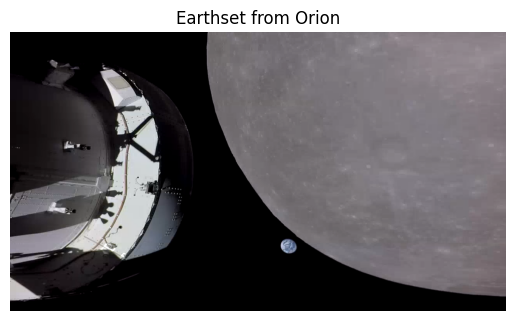

In [7]:
import requests
from skimage import io
import matplotlib.pyplot as plt

# Chave de API da NASA
api_key = 'MFr7OTvlxhuUnGnH8LFUPEaYRreWldAsN3tGO6vE'  # Substitua pela sua chave da API

# URL da API
url = f'https://api.nasa.gov/planetary/apod?api_key={api_key}'

# Fazendo a requisição GET para a API
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Extraindo os dados do JSON
    data = response.json()
    
    # Imprimindo copyright e explicação
    print(f"Copyright: {data.get('copyright', 'Não disponível')}")
    print(f"Explicação: {data['explanation']}")
    
    # Obtenção da URL da imagem (normal ou alta definição)
    image_url = data['hdurl']  # ou 'url' para uma versão com resolução menor
    
    # Lendo a imagem com scikit-image
    img = io.imread(image_url)
    
    # Exibindo a imagem com matplotlib
    plt.imshow(img)
    plt.title(data['title'])  # Título da imagem
    plt.axis('off')  # Desativando os eixos
    plt.show()

else:
    print(f"Erro na requisição: {response.status_code}")


#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [26]:
import requests

# Chave de API da NASA
api_key = 'MFr7OTvlxhuUnGnH8LFUPEaYRreWldAsN3tGO6vE'

# URL para consultar a API
url = 'https://api.nasa.gov/planetary/apod?api_key=' + api_key  # Exemplo com APOD (Astronomy Picture of the Day)

# Realiza a requisição GET
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida (status code 200)
if response.status_code == 200:
    # Imprime o conteúdo da resposta em formato JSON
    print("Resposta JSON:", response.json())
    
    # Acessa e imprime os cabeçalhos da resposta
    headers = response.headers
    print("Cabeçalhos da Resposta:")
    print(f"X-RateLimit-Limit: {headers.get('X-RateLimit-Limit')}")
    print(f"X-RateLimit-Remaining: {headers.get('X-RateLimit-Remaining')}")
else:
    print(f"Erro na requisição. Status code: {response.status_code}")

Resposta JSON: {'copyright': 'Bruno Rota Sargi', 'date': '2024-11-22', 'explanation': "Braided and serpentine filaments of glowing gas suggest this nebula's popular name, The Medusa Nebula. Also known as Abell 21, this Medusa is an old planetary nebula some 1,500 light-years away in the constellation Gemini. Like its mythological namesake, the nebula is associated with a dramatic transformation. The planetary nebula phase represents a final stage in the evolution of low mass stars like the sun as they transform themselves from red giants to hot white dwarf stars and in the process shrug off their outer layers. Ultraviolet radiation from the hot star powers the nebular glow. The Medusa's transforming star is the faint one near the center of the overall bright crescent shape. In this deep telescopic view, fainter filaments clearly extend below and to the left. The Medusa Nebula is estimated to be over 4 light-years across.", 'hdurl': 'https://apod.nasa.gov/apod/image/2411/MEDUSA_NEBULA_F

### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [17]:
import requests

def obter_imagem_do_dia(api_key):
    url = f'https://api.nasa.gov/planetary/apod?api_key={api_key}'
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Levanta um erro se a requisição falhar
        
        data = response.json()
        print("Título:", data['title'])
        print("Data:", data['date'])
        print("Descrição:", data['explanation'])
        print("URL da Imagem:", data['url'])
        
    except requests.exceptions.HTTPError as http_err:
        print(f"Erro HTTP: {http_err}")  # Informações detalhadas sobre o erro HTTP
    except requests.exceptions.RequestException as e:
        print(f"Ocorreu um erro na requisição: {e}")

#  Chave de API da NASA
api_key =  "MFr7OTvlxhuUnGnH8LFUPEaYRreWldAsN3tGO6vE"  

# Chame a função para obter a imagem do dia
obter_imagem_do_dia(api_key)

Título: The Sombrero Galaxy from Webb and Hubble
Data: 2024-11-26
Descrição: This floating ring is the size of a galaxy.  In fact, it is a galaxy -- or at least part of one: the photogenic Sombrero Galaxy is one of the largest galaxies in the nearby Virgo Cluster of Galaxies.  The dark band of dust that obscures the mid-section of the Sombrero Galaxy in visible light (bottom panel) actually glows brightly in infrared light (top panel).  The featured image shows the infrared glow in false blue, recorded recently by the space-based James Webb Space Telescope (JWST) and released yesterday,  pictured above an archival image taken by NASA's Hubble Space Telescope in visible light. The Sombrero Galaxy, also known as M104, spans about 50,000 light years and lies 28 million light years away.  M104 can be seen with a small telescope in the direction of the constellation Virgo.
URL da Imagem: https://apod.nasa.gov/apod/image/2411/Sombrero_WebbHubble_960.jpg


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
  "photos": [
    {
      "id": 1228212,
      "sol": 4102,
      "camera": {
        "id": 20,
        "name": "FHAZ",
        "rover_id": 5,
        "full_name": "Front Hazard Avoidance Camera"
      },
      "img_src": "https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/04102/opgs/edr/fcam/FLB_761645828EDR_F1060660FHAZ00302M_.JPG",
      "earth_date": "2024-02-19",
      "rover": {
        "id": 5,
        "name": "Curiosity",
        ...
      }
    }
    {
      "id": 1228213,
      "sol": 4102, 
      ...
    }
```



In [21]:
import requests

API_KEY = "MFr7OTvlxhuUnGnH8LFUPEaYRreWldAsN3tGO6vE"  
ROVER_NAME = 'curiosity'  # ou 'opportunity', 'spirit'
SOL = 4102  # Sol máximo obtido anteriormente

# URL correta para a API, com o nome do rover incluído
BASE_URL = f'https://api.nasa.gov/mars-photos/api/v1/rovers/{ROVER_NAME}/photos'

# Função para fazer a requisição e coletar dados das imagens
def get_images(sol, page=1):
    # Fazendo a requisição à API
    params = {'api_key': API_KEY, 'sol': sol, 'page': page}
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        print(f"Erro na requisição: {response.status_code}")
        return None  # Caso haja erro ou status 500

    data = response.json()
    photos = data.get('photos', [])
    
    if not photos:
        print("Não há mais fotos.")
        return None  # Se não houver fotos, retornar None para parar a requisição

    # Coletando informações das imagens
    collected_data = []
    for photo in photos:
        camera_name = photo['camera']['name']
        img_id = photo['id']
        img_date = photo['earth_date']  # Data da imagem na Terra

        # Armazena as informações relevantes
        collected_data.append({
            'id': img_id,
            'camera': camera_name,
            'date': img_date,
            'url': photo['img_src']  # URL da imagem
        })

    return collected_data  # Retorna os dados coletados

# Função para fazer a requisição com paginação até não haver mais fotos
def fetch_all_images(sol):
    page = 1
    all_photos = []  # List para armazenar todas as imagens
    while True:
        print(f"Requisitando página {page}...")
        result = get_images(sol, page)
        
        if result is None:
            break  # Se não houver mais fotos, parar a requisição
        
        all_photos.extend(result)  # Adiciona as fotos coletadas
        page += 1

    return all_photos  # Retorna todas as fotos coletadas

# Chamar a função de busca das imagens
fetched_images = fetch_all_images(SOL)

# Exibindo o total de imagens coletadas
print(f"Total de imagens coletadas: {len(fetched_images)}")

Requisitando página 1...
Requisitando página 2...
Requisitando página 3...
Requisitando página 4...
Não há mais fotos.
Total de imagens coletadas: 69
